In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Put this data into a variable

In [2]:
wrangled_WHO_data = pd.read_csv(r'C:\Users\moder\Documents\Springboard\PROJECTS ASSIGNMENTS files and instructions\Capstones\Capstone 2\wrangled_WHO_data.csv')

wrangled_WHO_data.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life_Expectancy,65.0,59.9,59.9,59.5,59.2
Adult Mortality,263.0,271.0,268.0,272.0,275.0
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
Percentage_Expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
Hepatitis B,65.0,62.0,64.0,67.0,68.0
Measles,1154,492,430,2787,3013


In [3]:
#reminder - data types
wrangled_WHO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Life_Expectancy               2938 non-null   float64
 4   Adult Mortality               2938 non-null   float64
 5   infant deaths                 2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   Percentage_Expenditure        2938 non-null   float64
 8   Hepatitis B                   2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-five deaths             2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

In [4]:
wrangled_WHO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Life_Expectancy               2938 non-null   float64
 4   Adult Mortality               2938 non-null   float64
 5   infant deaths                 2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   Percentage_Expenditure        2938 non-null   float64
 8   Hepatitis B                   2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-five deaths             2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

# Feature Selection

In [5]:
X = wrangled_WHO_data.drop(['Life_Expectancy','Country','Year'], axis=1)

print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (2938, 19)


In [6]:
X

,Status,Adult Mortality,infant deaths,Alcohol,Percentage_Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Resources,Schooling
0,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,723.0,27,4.36,8.717409,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Developing,715.0,26,4.06,8.717409,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Developing,73.0,25,4.43,8.717409,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Developing,686.0,25,1.72,8.717409,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
X = pd.get_dummies(X)

In [8]:
X

,Adult Mortality,infant deaths,Alcohol,Percentage_Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Resources,Schooling,Status_Developed,Status_Developing
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,8.717409,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,715.0,26,4.06,8.717409,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,73.0,25,4.43,8.717409,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,686.0,25,1.72,8.717409,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [9]:
y = wrangled_WHO_data['Life_Expectancy']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (2938,)


In [10]:
list(X.columns)

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Percentage_Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income_Composition_Resources',
 'Schooling',
 'Status_Developed',
 'Status_Developing']

In [11]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

# Split into Train and Test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_test)) + ')')

Training split has  2203  rows
 and the corresponding labels have an equal number of values. (2203)
Test split has  735  rows
 and the corresponding labels have an equal number of values. (735)


# Recalling the guided capstone, it had us consider the MEAN - how good the mean is as a predictor?

In [13]:
#Fit the dummy regressor on the training data
from sklearn.dummy import DummyRegressor

dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[69.16806627]])

In [14]:
#check out some metrics - again referring back to guided capstone

#r^2
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([69.16806627, 69.16806627, 69.16806627, 69.16806627, 69.16806627])

In [15]:
#Calculate the R^2 - amount of variance
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
      
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

r_squared(y_train, y_tr_pred)

0.0

If you use the average value as your prediction, you get an R^2 of zero on the training set. What if you use this "model" to predict unseen values from the test set? Remember, of course, that your "model" is trained on the training set; you still use the training set mean as your prediction.

Make your predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [16]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

69.1680662732637

In [17]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00038692692903219417

In [18]:
#use sklearn to compare
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00038692692903219417)

OK this fits the data really poorly!

In [19]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(7.789523406059784, 7.775434364394878)

SO this is saying that this essentially says, on average, we'd be off by around 8 (eight) years (of life expectancy) if we guessed based on an average of known values.

In [20]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(90.39889058662011, 90.51160014803055)

In [21]:
print('Train MSE: ',np.sqrt(mean_squared_error(y_train, y_tr_pred)))
print('Test MSE: ',np.sqrt(mean_squared_error(y_test, y_te_pred)))

Train MSE:  9.507833117310174
Test MSE:  9.513758465928728


Error on both train and test about 9.5 (life expectancy years).

# Standardize the magnitude of numeric features using a scaler

In [22]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

# Model 1: Linear Regression

Train the model on the train split

In [23]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

Make predictions using the model on both train and test splits

In [24]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

Assess model performance

In [25]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8210836390531903, 0.8085813264421107)

A simple linear regression model explains about 80% of the variance on the train set and basically the same on the test set. Not bad!

Calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function

In [26]:
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(3.055219887965021, 3.079398079367959)

Using this model, then, on average you'd expect to estimate life expectancy within 3 or so years of the actual number.

In [27]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(16.173840537386884, 17.31890928955247)

In [28]:
print('Train MSE: ',np.sqrt(mean_squared_error(y_train, y_tr_pred)))
print('Test MSE: ',np.sqrt(mean_squared_error(y_test, y_te_pred)))

Train MSE:  4.021671361186401
Test MSE:  4.161599366776248


# Linear Regression: Summary

In [29]:
# score the model on the train set
print('Train score: {}\n'.format(lm.score(X_tr_scaled,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(lm.score(X_te_scaled,y_test)))
# calculate the overall accuracy of the model
print('Overall model R2: {}\n'.format(r2_score(y_test,y_te_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,y_te_pred))))

Train score: 0.8210836390531903

Test score: 0.8085813264421107

Overall model R2: 0.8085813264421107

Mean Squared Error: 4.161599366776248


No overfitting here. R2 looking good. MSE not too bad.

In [30]:
#save model score for comparison 
lrR2 = r2_score(y_test,y_te_pred)

# Model 2: KNN

In [31]:
from math import sqrt
%matplotlib inline

Store rmse values for different k. RMSE measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy). A value of 0 would indicate a perfect fit to the data.

In [32]:
rmse_val = [] 

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_tr_scaled, y_train) #fit model
    pred = model.predict(X_te_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print("RMSE value for k=", K, "is:", error)

RMSE value for k= 1 is: 2.899148948545131
RMSE value for k= 2 is: 2.6605220448288733
RMSE value for k= 3 is: 2.63097615445698
RMSE value for k= 4 is: 2.699453089292814
RMSE value for k= 5 is: 2.777972392275506
RMSE value for k= 6 is: 2.839823848374387
RMSE value for k= 7 is: 2.9376664337666742
RMSE value for k= 8 is: 3.0047626682655055
RMSE value for k= 9 is: 3.0560440755634306
RMSE value for k= 10 is: 3.0951655302849224
RMSE value for k= 11 is: 3.1753998919906268
RMSE value for k= 12 is: 3.2415870528670356
RMSE value for k= 13 is: 3.2492535099272795
RMSE value for k= 14 is: 3.2593539926275654
RMSE value for k= 15 is: 3.3004922901774494
RMSE value for k= 16 is: 3.338083881000991
RMSE value for k= 17 is: 3.3572048545861204
RMSE value for k= 18 is: 3.396811903498888
RMSE value for k= 19 is: 3.4131448347461575
RMSE value for k= 20 is: 3.4346691411027552


<AxesSubplot:>

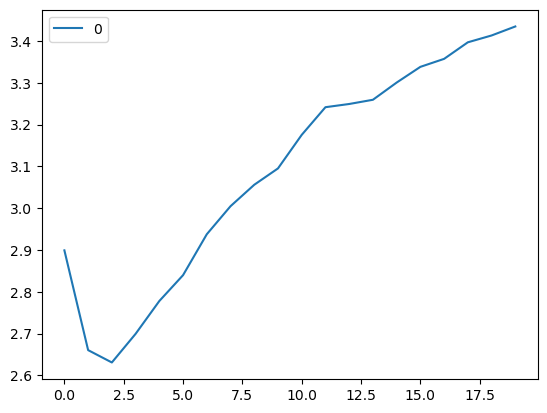

In [33]:
curve = pd.DataFrame(rmse_val)
curve.plot()

I'm going to go with a K of 3

Instantiate and fit the model using the training data and training targets

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
model2 = neighbors.KNeighborsRegressor(n_neighbors = 3)

model2.fit(X_tr_scaled, y_train)

print(model2)

KNeighborsRegressor(n_neighbors=3)


In [35]:
model2.predict(X_te_scaled)

array([75.3       , 81.03333333, 74.06666667, 60.63333333, 55.23333333,
       54.4       , 78.        , 56.4       , 78.66666667, 74.7       ,
       75.03333333, 54.63333333, 72.26666667, 68.46666667, 68.3       ,
       80.16666667, 71.9       , 80.76666667, 68.36666667, 73.6       ,
       51.86666667, 57.66666667, 50.06666667, 74.56666667, 72.66666667,
       70.63333333, 77.03333333, 78.5       , 46.73333333, 64.26666667,
       63.6       , 73.76666667, 80.36666667, 54.86666667, 60.46666667,
       75.43333333, 70.23333333, 76.53333333, 74.3       , 74.7       ,
       63.56666667, 75.93333333, 65.4       , 46.96666667, 45.73333333,
       57.8       , 73.73333333, 74.        , 69.36666667, 61.3       ,
       75.3       , 64.36666667, 75.6       , 75.26666667, 75.03333333,
       77.4       , 71.7       , 76.76666667, 50.8       , 71.73333333,
       73.36666667, 66.83333333, 74.        , 61.1       , 72.36666667,
       72.73333333, 68.1       , 82.33333333, 75.8       , 70.86

# KNN Summary

In [36]:
# score the model on the train set
print('Train score: {}\n'.format(model2.score(X_tr_scaled,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model2.score(X_te_scaled,y_test)))
print('Overall model R2: {}\n'.format(r2_score(y_test,pred)))

Train score: 0.9578504257422236

Test score: 0.9234936313583626

Overall model R2: 0.8696132136875967



This is looking quite good - high scores, slightly higher R2 than Linear Regression.

In [38]:
#save model score for comparison
knnR2 = r2_score(y_test,pred)

# Model 3: Decision Tree

In [39]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

Fit regression model, predict

In [40]:
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)
print("Score: ",r2_score(y_test, yhat))
print("MAE: ",mean_absolute_error(y_test, yhat))
print("MSE: ",np.sqrt(mean_squared_error(y_test, yhat)))

Score:  0.9073555618478412
MAE:  1.7490476190476192
MSE:  2.895194822671609


The model score is 90%! Nice. The MAE and MSE aren't bad!

Comparing the Real Values with Predicted Values

In [42]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':yhat})
df

,Real Values,Predicted Values
1929,76.0,76.0
2347,85.0,89.0
1876,73.0,64.4
2257,62.1,59.9
846,53.8,56.4
...,...,...
2750,76.3,76.0
2515,85.0,88.0
708,69.8,73.4
655,74.9,77.2


Experiment with tuning the tree, even though the scores are already very high.

# Tuning of the Tree

In [43]:
# define the hyperparameters
params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                

In [44]:
# initialize the grid search
tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  

In [45]:
tree_search.fit(X_train,y_train)   # fit the model
tree_pred = tree_search.predict(X_test)  # make predictions with the model

In [47]:
# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(X_train,y_train)))
print('Test score: {}\n'.format(tree_search.score(X_test,y_test)))
print('Overall model R2: {}\n'.format(r2_score(y_test,tree_pred)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,tree_pred))))

Best parameter found:
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}

Train score: 0.9556278073086907

Test score: 0.9178792569811887

Overall model R2: 0.9178792569811887

Mean Squared Error: 2.7258035488577526


In [48]:
#save model score for comparison
dtR2 = r2_score(y_test,tree_pred)

This slightly improved scores that were already quite good!

# Model 4: Random Forest

In [49]:
import seaborn as sns

#RF doesn't need scaled data
forest = RandomForestRegressor()

In [50]:
#Creating the model on Training Data

forest.fit(X_train, y_train)

prediction=forest.predict(X_test)

In [52]:
#scoring
print('Train score: {}\n'.format(forest.score(X_train,y_train)))
print('Test score: {}\n'.format(forest.score(X_test,y_test)))
print('Overall model R2: {}\n'.format(r2_score(y_test,prediction)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))

Train score: 0.9943652145649743

Test score: 0.9633052706154228

Overall model R2: 0.9633052706154228

Mean Squared Error: 1.8220905769879547


Excellent! Even better than Decision Tree. Try tuning, although it's performing remarkably well.

# Tuning

In [55]:
# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]


forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)


forest_search.fit(X_train,y_train)  # fit the model


forest_pred = forest_search.predict(X_test)  # make prediction with the model


# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(X_train,y_train)))
print('Test score: {}\n'.format(forest_search.score(X_test,y_test)))
print('Overall model R2: {}\n'.format(r2_score(y_test,forest_pred)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,forest_pred))))

Best parameter found:
{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 7}

Train score: 0.9683338265472317

Test score: 0.9509761568629735

Overall model R2: 0.9509761568629735

Mean Squared Error: 2.106065115178324


This actually made it worse, although slightly less overfitted. Going to toss the tuning.

In [58]:
#save model score for comparison
rfR2 = r2_score(y_test,prediction)

# Model 5: Gradient Boosting

I'm just going to go ahead and apply the tuning!

In [60]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(X_train,y_train)   # fit the model

gradient_pred = gradient_search.predict(X_test)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(X_train,y_train)))
print('Test score: {}\n'.format(gradient_search.score(X_test,y_test)))
print('Overall model R2: {}\n'.format(r2_score(y_test,gradient_pred)))
print('Mean Squared Error: {}\n'.format(np.sqrt(mean_squared_error(y_test,gradient_pred))))

Best parameter found:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}

Train score: 0.9981176933583014

Test score: 0.963120771276268

Overall model R2: 0.963120771276268

Mean Squared Error: 1.82666552555194



This is performing about as well as the trees!

In [62]:
#save model score for comparison of models
gbR2 = r2_score(y_test,gradient_pred)

# Compare scoring of all models under consideration

In [64]:
print("Linear Regression score: ", lrR2)
print("KNN score: ", knnR2)
print("Decision Tree score: ", dtR2)
print("Random Forest score: ", rfR2)
print("Gradient Boosting score: ", gbR2)

Linear Regression score:  0.8085813264421107
KNN score:  0.8696132136875967
Decision Tree score:  0.9178792569811887
Random Forest score:  0.9633052706154228
Gradient Boosting score:  0.963120771276268


# Conclusion

The best model here is Random Forest, with Gradient Boosting close behind. All had remarkably good performance!

# Feature Importance for Random Forest Model

Test feature importance using Random Forest model.

In [112]:
forest.feature_importances_

array([1.24793451e-01, 4.81756745e-03, 8.81113338e-03, 3.47612572e-03,
       2.83880371e-03, 3.05025170e-03, 1.80372568e-02, 1.25894611e-02,
       5.39831009e-03, 6.34608487e-03, 4.50634513e-03, 5.95438315e-01,
       3.04001945e-03, 4.30586001e-03, 6.33588890e-03, 1.66717758e-02,
       1.66625888e-01, 1.25672665e-02, 1.63515788e-04, 1.86679463e-04])

In [113]:
forest.feature_names_in_

array(['Adult Mortality', 'infant deaths', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income_Composition_Resources', 'Schooling',
       'Status_Developed', 'Status_Developing'], dtype=object)

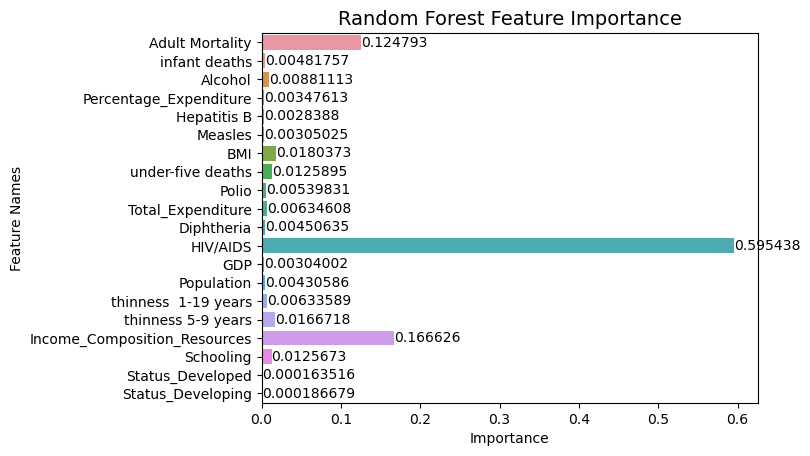

In [120]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : forest.feature_names_in_, 
                               "importances" : forest.feature_importances_})

g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names")
g.set(xlabel='Importance', ylabel='Feature Names')
g.set_title("Random Forest Feature Importance", fontsize=14)
for value in g.containers:
    g.bar_label(value)


Super interesting - this doesn't actually correspond exactly with what I ascertained from the EDA step - save for the Income Composition of Resources feature, which I do see confirmed here as being of importance. I didn't see HIV/AIDS as being important - this may require revisiting the scale/measurement of the features. Nevertheless, the performance of the Random Forest model here was outstanding.